<a href="https://www.kaggle.com/code/abhilashdas/24-hours-weather-data?scriptVersionId=141729330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly
import plotly.express as px
import plotly.graph_objects as go

import phik
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


!['dasdasd'](https://i.pinimg.com/originals/1c/3b/ef/1c3befdda0ec692e737975d19dbaae9e.gif)

[](https://earth.nullschool.net/#current/wind/surface/level/overlay=temp/orthographic=-278.59,21.17,319)

In [2]:
df = pd.read_csv('/kaggle/input/indian-weather-repository-daily-snapshot/IndianWeatherRepository.csv')

In [3]:
num_cols = df.dtypes[df.dtypes != 'object'].index
print('Numeric Columns are:\n', list(num_cols))
print("\n*"*3, '\n')
obj_cols = df.dtypes[df.dtypes == 'object'].index
print('Object columns are:\n', list(obj_cols))

Numeric Columns are:
 ['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius', 'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination']

*
*
* 

Object columns are:
 ['country', 'location_name', 'region', 'timezone', 'last_updated', 'condition_text', 'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase']


In [4]:
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,Partly cloudy,12.8,20.5,281,WNW,1008.0,29.77,0.0,0.0,67,26,29.7,85.5,10.0,6.0,7.0,14.8,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,Sunny,9.6,15.5,287,WNW,1008.0,29.78,0.0,0.0,70,19,30.0,86.0,10.0,6.0,7.0,11.2,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,Partly cloudy,11.4,18.4,317,NW,1009.0,29.78,0.0,0.0,70,51,28.2,82.8,10.0,6.0,7.0,13.2,21.2,220.3,57.2,0.6,1.7,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,Cloudy,10.5,16.9,297,WNW,1009.0,29.80,0.0,0.0,76,65,27.6,81.7,10.0,6.0,6.0,13.0,20.9,200.3,25.0,1.2,1.1,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,Cloudy,10.1,16.2,274,W,1009.0,29.79,0.0,0.0,74,82,29.9,85.8,10.0,6.0,6.0,11.6,18.7,257.0,30.8,2.2,1.8,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [5]:
df['country'].unique()   ### So all readings are from India

array(['India'], dtype=object)

In [6]:
df.groupby('timezone').agg('count')
# 3 different timezones

,country,location_name,region,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
timezone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Asia/Dhaka,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Asia/Karachi,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Asia/Kolkata,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721


In [7]:
# let's only focus on data from 1 timezone
df = df[df['timezone'] == 'Asia/Kolkata']

In [8]:
all_states = df['region'].unique()
print(all_states, '\n')
print('*\n'*3)
print('Some states are missing, they are: ') 

['Madhya Pradesh' 'Uttar Pradesh' 'Orissa' 'Rajasthan' 'Gujarat'
 'Himachal Pradesh' 'Chhattisgarh' 'Jammu and Kashmir' 'Daman and Diu'
 'Dadra and Nagar Haveli' 'Andhra Pradesh' 'Jharkhand' 'Bihar'
 'West Bengal' 'Maharashtra' 'Haryana' 'Chandigarh' 'Goa'
 'Andaman and Nicobar Islands' 'Arunachal Pradesh' 'Assam' 'Puducherry'
 'Kerala' 'Mizoram' 'Manipur' 'Nagaland' 'Tripura' 'Karnataka'
 'Uttarakhand' 'Lakshadweep' 'Punjab' 'Tamil Nadu' 'Delhi'] 

*
*
*

Some states are missing, they are: 


| State | Union Territory |
| --- | --- |
| Telangana | Ladakh |
|  | Delhi |



# Grouping of features

In [9]:
# print(df.columns)
df['last_updated'] = pd.to_datetime(df['last_updated'], format='%Y-%m-%d %H:%M:%S')
# converting to datetime format


In [10]:
from datetime import datetime, timedelta

dates = df['last_updated'].unique()
print(dates)

twenty_four_hours_ago = np.datetime64(datetime.now() - timedelta(hours=24))
newer_than_24hr = dates[dates > twenty_four_hours_ago]
print('\n\n',newer_than_24hr)
# df[df['last_updated'] == '2023-08-31 05:15']

['2023-08-29T10:45:00.000000000' '2023-08-30T08:45:00.000000000'
 '2023-08-30T09:00:00.000000000' '2023-08-31T05:15:00.000000000'
 '2023-08-31T05:30:00.000000000' '2023-09-01T05:15:00.000000000'
 '2023-09-02T05:15:00.000000000' '2023-09-02T05:30:00.000000000']


 ['2023-09-02T05:15:00.000000000' '2023-09-02T05:30:00.000000000']


In [11]:
last_24_hr = []

for i in range(len(newer_than_24hr)):
#     print(i)
    last_24_hr.append(df[df['last_updated'] == newer_than_24hr[i]])
    
last_24_hr = pd.concat(last_24_hr, ignore_index=True)

In [12]:
print('Datapoints within the last 24hours: ' , last_24_hr.shape[0])

Datapoints within the last 24hours:  546


In [13]:
last_24_hr.head() ### This variable now contains all the weather data on ...
# India within the last 24 hours(timezone: Asia/Kolkata)

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693611900,2023-09-02 05:15:00,24.9,76.8,Clear,7.8,12.6,263,W,1007.0,29.74,0.0,0.0,73,12,26.6,79.9,10.0,6.0,1.0,15.4,24.8,277.0,60.1,1.7,2.4,42.3,55.0,3,5,06:00 AM,06:38 PM,07:47 PM,07:06 AM,Waning Gibbous,99
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693611900,2023-09-02 05:15:00,24.5,76.1,Clear,6.3,10.1,274,W,1007.0,29.75,0.0,0.0,72,12,26.2,79.2,10.0,6.0,1.0,12.5,20.2,350.5,36.8,4.2,2.0,37.9,49.9,2,4,06:01 AM,06:37 PM,07:46 PM,07:06 AM,Waning Gibbous,99
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693611900,2023-09-02 05:15:00,23.0,73.4,Clear,4.5,7.2,334,NNW,1008.0,29.76,0.0,0.0,77,21,25.1,77.2,10.0,6.0,1.0,9.4,15.1,267.0,43.3,2.0,0.6,31.3,42.1,2,3,05:57 AM,06:31 PM,07:41 PM,07:02 AM,Waning Gibbous,99
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693611900,2023-09-02 05:15:00,22.8,73.0,Clear,2.2,3.6,212,SSW,1008.0,29.76,0.0,0.0,81,19,25.0,77.0,10.0,6.0,1.0,2.5,4.0,313.8,22.7,3.4,0.7,33.7,40.7,2,3,06:01 AM,06:35 PM,07:45 PM,07:06 AM,Waning Gibbous,99
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693611900,2023-09-02 05:15:00,24.0,75.2,Clear,3.8,6.1,271,W,1007.0,29.74,0.0,0.0,74,17,25.8,78.4,10.0,6.0,1.0,8.1,13.0,353.8,24.3,3.8,0.5,32.2,42.8,2,3,06:01 AM,06:37 PM,07:46 PM,07:07 AM,Waning Gibbous,99


In [14]:
last_24_hr_Weather = last_24_hr[['location_name', 'region', 'latitude', 'longitude',
                         'last_updated',
                       'temperature_celsius',
                       'condition_text', 'wind_kph',
                       'wind_degree', 'wind_direction', 'pressure_mb', 
                       'precip_mm', 'humidity', 'cloud', 'feels_like_celsius',
                       'visibility_km', 
                       'uv_index', 'gust_kph']]
### We have dropped some columns

In [15]:
last_24_hr_AirQuality = last_24_hr[['air_quality_Carbon_Monoxide',
                       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
                       'air_quality_us-epa-index', 'air_quality_gb-defra-index']]

In [16]:
last_24_hr_AstronomicalPhenemenon = last_24_hr[['sunrise',
                       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']]

In [17]:
last_24_hr_Weather.columns

Index(['location_name', 'region', 'latitude', 'longitude', 'last_updated',
       'temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree',
       'wind_direction', 'pressure_mb', 'precip_mm', 'humidity', 'cloud',
       'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph'],
      dtype='object')

In [18]:
last_24_hr_Weather = last_24_hr_Weather.assign(Ult_location=last_24_hr_Weather['location_name'] + '-' + last_24_hr_Weather['region'] + ' @ ' + last_24_hr_Weather['last_updated'].astype(str))

I'am unable to set the location to india when the Map opens, so **YOU NEED TO INTERACT AND MOVE TO INDIA** by yourself, any help will be appreciated and thanked for

# Weather 

In [19]:
# fig = go.Figure(data=go.Scattergeo(
#     lat = last_24_hr_Weather['latitude'],
#     lon = last_24_hr_Weather['longitude'],
#     text = last_24_hr_Weather['Ult_location'].astype(str) + last_24_hr_Weather['temperature_celsius'].astype(str) + ' *C',
#     marker = dict(
#         color = last_24_hr_Weather['temperature_celsius'],
#         colorscale = 'temps',
#         reversescale = False,
#         opacity = 0.7,
#         size = 3.5,
#         colorbar = dict(
#             titleside = "right",
#             outlinecolor = "rgba(68, 68, 68, 0)",
#             ticks = "outside",
#             showticksuffix = "last",
# #             dtick = 0.1
#         )
#     )
# ))


# fig.update_layout(
#     geo = dict(

#         showland = True,
#         landcolor = "rgb(212, 212, 212)",
#         subunitcolor = "rgb(255, 255, 255)",
#         countrycolor = "rgb(255, 255, 255)",
#         showlakes = True,
#         lakecolor = "rgb(255, 255, 255)",
#         showsubunits = True,
#         showcountries = True,
# #         center=dict(
# #             lat=20.5937,
# #             lon=78.9629
# #         ),
#         resolution = 50,
#         projection = dict(
#             type = 'conic conformal',
#             rotation_lon = -100
#         ),
#         lonaxis = dict(
#             showgrid = True,
#             gridwidth = 0.5,
#             range= [ -140.0, -55.0 ],
#             dtick = 5
#         ),
#         lataxis = dict (
#             showgrid = True,
#             gridwidth = 0.5,
#             range= [ 20.0, 60.0 ],
#             dtick = 5
#         )
#     ),
#     title='Indian Weather Temperature (°C) within the last 24 hours',
# )

# # fig.update_layout(
# #             geo = dict(  
# #                 center=dict(
# #                     lat=20.5937,
# #                     lon=78.9629)
# #             )
# # )
# fig.show()

In [20]:
last_24_hr_Weather.head(4)

,location_name,region,latitude,longitude,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,Ult_location
0,Ashoknagar,Madhya Pradesh,24.57,77.72,2023-09-02 05:15:00,24.9,Clear,12.6,263,W,1007.0,0.0,73,12,26.6,10.0,1.0,24.8,Ashoknagar-Madhya Pradesh @ 2023-09-02 05:15:00
1,Raisen,Madhya Pradesh,23.33,77.80,2023-09-02 05:15:00,24.5,Clear,10.1,274,W,1007.0,0.0,72,12,26.2,10.0,1.0,20.2,Raisen-Madhya Pradesh @ 2023-09-02 05:15:00
2,Chhindwara,Madhya Pradesh,22.07,78.93,2023-09-02 05:15:00,23.0,Clear,7.2,334,NNW,1008.0,0.0,77,21,25.1,10.0,1.0,15.1,Chhindwara-Madhya Pradesh @ 2023-09-02 05:15:00
3,Betul,Madhya Pradesh,21.86,77.93,2023-09-02 05:15:00,22.8,Clear,3.6,212,SSW,1008.0,0.0,81,19,25.0,10.0,1.0,4.0,Betul-Madhya Pradesh @ 2023-09-02 05:15:00


# Temperature within the last 24 hours

In [21]:
import folium
from folium.plugins import HeatMap

# Create a base map centered at a location
m = folium.Map(location=[last_24_hr_Weather['latitude'].mean(), last_24_hr_Weather['longitude'].mean()], zoom_start=4.7)

# Combine latitude and longitude into a list of lists
heat_data = [[row['latitude'], row['longitude'], row['temperature_celsius']] for index, row in last_24_hr_Weather.iterrows()]

# Create a HeatMap layer and add it to the map
HeatMap(heat_data, radius=15).add_to(m)

# Display the map
m.save('temperature_heatmap.html')




# Create a marker cluster layer
marker_cluster = folium.plugins.MarkerCluster()
for index, row in last_24_hr_Weather.iterrows():
    # Choose the marker color based on the temperature value
    if row['temperature_celsius'] < 15:
        color = 'blue'
    elif row['temperature_celsius'] < 25:
        color = 'green'
    elif row['temperature_celsius'] < 35:
        color = 'orange'
    else:
        color = 'red'
    # Create a marker with a popup and an icon
    popup = f"{row['location_name']}<br>Temperature: {row['temperature_celsius']} °C"
    icon = folium.Icon(color=color)
    marker = folium.Marker(location=[row['latitude'], row['longitude']], popup=popup, icon=icon)
    # Add the marker to the cluster
    marker_cluster.add_child(marker)
marker_cluster.add_to(m)




m

Ehhhh, good enough

 **I've grouped the provided features into relevant categories. Here's the information in a tabular format:**


| **Location Information** | **Temperature** | **Weather Condition** | **Wind** | **Atmospheric Measurements** | **UV Index** | **Air Quality Measurements** | **Astronomical Data** |
|--------------------------|-----------------|-----------------------|---------|-----------------------------|--------------|-----------------------------|----------------------|
| location_name            | temperature_celsius | condition_text   | wind_kph | pressure_mb                 | uv_index     | air_quality_Carbon_Monoxide | sunrise          |
| region                   | feels_like_celsius |                   | wind_degree | precip_mm                   |              | air_quality_Ozone           | sunset           |
| latitude                 |                 |                   | wind_direction | humidity                   |              | air_quality_Nitrogen_dioxide | moonrise         |
| longitude                |                 |                   | gust_kph | cloud                       |              | air_quality_Sulphur_dioxide | moonset          |
| last_updated             |                 |                   |           | visibility_km               |              | air_quality_PM2.5           | moon_phase        |
|                          |                 |                   |           |                           |              | air_quality_PM10            | moon_illumination |

# ********||************||************🐨 A lovely Earth ☁️ 🌏**********||*********************||****

In [22]:
!pip install basemap
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 33.7 MB/s eta 0:00:00


In [23]:
# # import basemap as Basemap

# m = Basemap(projection='cyl', llcrnrlon=90, llcrnrlat=-15, urcrnrlon=150, urcrnrlat=15, resolution='i')
# m.drawcoastlines(1)
# m.drawcountries()

# parallels = np.arange(-15,15+0.25,5)
# m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
# meridians = np.arange(90,150+0.25,10)
# m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

In [24]:
last_24_hr_Weather.head(2)

,location_name,region,latitude,longitude,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,Ult_location
0,Ashoknagar,Madhya Pradesh,24.57,77.72,2023-09-02 05:15:00,24.9,Clear,12.6,263,W,1007.0,0.0,73,12,26.6,10.0,1.0,24.8,Ashoknagar-Madhya Pradesh @ 2023-09-02 05:15:00
1,Raisen,Madhya Pradesh,23.33,77.80,2023-09-02 05:15:00,24.5,Clear,10.1,274,W,1007.0,0.0,72,12,26.2,10.0,1.0,20.2,Raisen-Madhya Pradesh @ 2023-09-02 05:15:00


In [25]:
# u = last_24_hr_Weather["wind_kph"] * np.cos(np.radians(last_24_hr_Weather["wind_degree"]))
# v = last_24_hr_Weather["wind_kph"] * np.sin(np.radians(last_24_hr_Weather["wind_degree"]))

In [26]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm


# u = last_24_hr_Weather["wind_kph"] * np.cos(np.radians(last_24_hr_Weather["wind_degree"]))
# v = last_24_hr_Weather["wind_kph"] * np.sin(np.radians(last_24_hr_Weather["wind_degree"]))

# plt.figure()
# plt.quiver(last_24_hr_Weather["latitude"], last_24_hr_Weather["longitude"], u, v, last_24_hr_Weather["wind_kph"],angles=270-last_24_hr_Weather["wind_degree"], cmap=cm.viridis)

In [27]:
# import plotly.figure_factory as ff
# import numpy as np

# x, y = np.meshgrid(np.arange(0, 2, .2), np.arange(0, 2, .2))
# u = np.cos(x) * y
# v = np.sin(x) * y

# fig = ff.create_quiver(x, y, u, v)
# fig.show()

In [28]:
# cf = plt.contourf(last_24_hr_Weather['longitude'],last_24_hr_Weather['latitude'],last_24_hr_Weather['wind_kph'], cmap='jet')
# cb = plt.colorbar(cf, fraction=0.0235, pad=0.03 )
# cb.set_label('m/s',  fontsize=15)

# plt.show()

In [29]:
last_24_hr_Weather.columns

Index(['location_name', 'region', 'latitude', 'longitude', 'last_updated',
       'temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree',
       'wind_direction', 'pressure_mb', 'precip_mm', 'humidity', 'cloud',
       'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'Ult_location'],
      dtype='object')

In [30]:
andaman_d = last_24_hr_Weather[last_24_hr_Weather['region'] == 'Andaman and Nicobar Islands']
andaman_d
# 33.1 237

,location_name,region,latitude,longitude,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,Ult_location
186,Arong,Andaman and Nicobar Islands,9.17,92.72,2023-09-02 05:15:00,27.0,Moderate or heavy rain shower,33.1,237,WSW,1009.0,3.3,83,90,30.6,7.0,6.0,52.6,Arong-Andaman and Nicobar Islands @ 2023-09-02...


In [31]:
def meteo_to_math_wind_dir(meteo_wind_dir: float) -> float:
    math_wind_dir = 270 - meteo_wind_dir
    if math_wind_dir < 0:
        math_wind_dir += 360
    return math_wind_dir

In [32]:
import plotly.figure_factory as ff
import numpy as np
import matplotlib
import math 

# Set up the data
lon = last_24_hr_Weather['longitude'] # your longitude data
lat = last_24_hr_Weather['latitude'] # your latitude data
wind_speed = last_24_hr_Weather['wind_kph'] # your wind speed data in km/h
wind_dir = last_24_hr_Weather['wind_degree'] # your wind direction data in degrees

# Convert wind speed from km/h to m/s
wind_speed = np.array(wind_speed) / 3.6

# # Convert from meteorological angle to math angle
k = wind_dir.map(meteo_to_math_wind_dir)


# Convert wind direction from degrees to radians
k = np.deg2rad(k)

# Calculate the u and v components of the wind vectors
u = wind_speed * np.cos(k)
v = wind_speed * np.sin(k)


# Create the quiver plot
fig = ff.create_quiver(lon, lat, u, v,scale=0.4,opacity=0.6)

# Update the layout to set the figure size
fig.update_layout(
    autosize=False,
    width=700,
    height=900,
)
fig.show()

# create_quiver(x, y, u, v, scale=0.1, arrow_scale=0.3, angle=math.pi / 9, scaleratio=None, *, arg=None, alignmentgroup=None, cliponaxis=None, connectgaps=None, customdata=None, customdatasrc=None, dx=None, dy=None, error_x=None, error_y=None, fill=None, fillcolor=None, fillpattern=None, groupnorm=None, hoverinfo=None, hoverinfosrc=None, hoverlabel=None, hoveron=None, hovertemplate=None, hovertemplatesrc=None, hovertext=None, hovertextsrc=None, ids=None, idssrc=None, legend=None, legendgroup=None, legendgrouptitle=None, legendrank=None, legendwidth=None, line=None, marker=None, meta=None, metasrc=None, name=None, offsetgroup=None, opacity=None, orientation=None, selected=None, selectedpoints=None, showlegend=None, stackgaps=None, stackgroup=None, stream=None, text=None, textfont=None, textposition=None, textpositionsrc=None, textsrc=None, texttemplate=None, texttemplatesrc=None, uid=None, uirevision=None, unselected=None, visible=None, x0=None, xaxis=None, xcalendar=None, xhoverformat=None, xperiod=None, xperiod0=None, xperiodalignment=None, xsrc=None, y0=None, yaxis=None, ycalendar=None, yhoverformat=None, yperiod=None, yperiod0=None, yperiodalignment=None, ysrc=None, **kwargs: _VT)
# Returns data for a quiver plot.

# x ((list|ndarray)): x coordinates of the arrow locations
# y ((list|ndarray)): y coordinates of the arrow locations
# u ((list|ndarray)): x components of the arrow vectors
# v ((list|ndarray)): y components of the arrow vectors :param (float in [0,1]) scale: scales size of the arrows(ideally to avoid overlap). Default = .1 :param (float in [0,1]) arrow_scale: value multiplied to length of barb to get length of arrowhead. Default = .3 :param (angle in radians) angle: angle of arrowhead. Default = pi/9 :param (positive float) scaleratio: the ratio between the scale of the y-axis and the scale of the x-axis (scale_y / scale_x). Default = None, the scale ratio is not fixed.
# kwargs: kwargs passed through plotly.graph_objs.Scatter for more information on valid kwargs call help(plotly.graph_objs.Scatter)
# :rtype (dict): returns a representation of quiver figure.



In [33]:
type(fig)

plotly.graph_objs._figure.Figure

In [34]:
# # Example 1: Trivial Quiver
# from plotly.figure_factory import create_quiver
# import math
# # 1 Arrow from (0,0) to (1,1)
# fig = create_quiver(x=[0], y=[0], u=[1], v=[1], scale=1)
# fig.show()


# # Example 2: Quiver plot using meshgrid
# from plotly.figure_factory import create_quiver
# import numpy as np
# import math
# # Add data
# x,y = np.meshgrid(np.arange(0, 2, .2), np.arange(0, 2, .2))
# u = np.cos(x)*y
# v = np.sin(x)*y
# #Create quiver
# fig = create_quiver(x, y, u, v)
# fig.show()

# Example 3: Styling the quiver plot
# from plotly.figure_factory import create_quiver
# import numpy as np
# import math
# # Add data
# x, y = np.meshgrid(np.arange(-np.pi, math.pi, .5),
#                    np.arange(-math.pi, math.pi, .5))
# u = np.cos(x)*y
# v = np.sin(x)*y
# # Create quiver
# fig = create_quiver(x, y, u, v, scale=.2, arrow_scale=.3, angle=math.pi/6,
#                     name='Wind Velocity', line=dict(width=1))
# # Add title to layout
# fig.update_layout(title='Quiver Plot') # doctest: +SKIP
# fig.show()



# # Example 4: Forcing a fix scale ratio to maintain the arrow length
# from plotly.figure_factory import create_quiver
# import numpy as np
# # Add data
# x,y = np.meshgrid(np.arange(0.5, 3.5, .5), np.arange(0.5, 4.5, .5))
# u = x
# v = y
# angle = np.arctan(v / u)
# norm = 0.25
# u = norm * np.cos(angle)
# v = norm * np.sin(angle)
# # Create quiver with a fix scale ratio
# fig = create_quiver(x, y, u, v, scale = 1, scaleratio = 0.5)
# fig.show()

In [35]:
k

0      0.122173
1      6.213372
2      5.166175
3      1.012291
4      6.265732
         ...   
541    6.073746
542    2.652900
543    1.291544
544    0.052360
545    5.794493
Name: wind_degree, Length: 546, dtype: float64

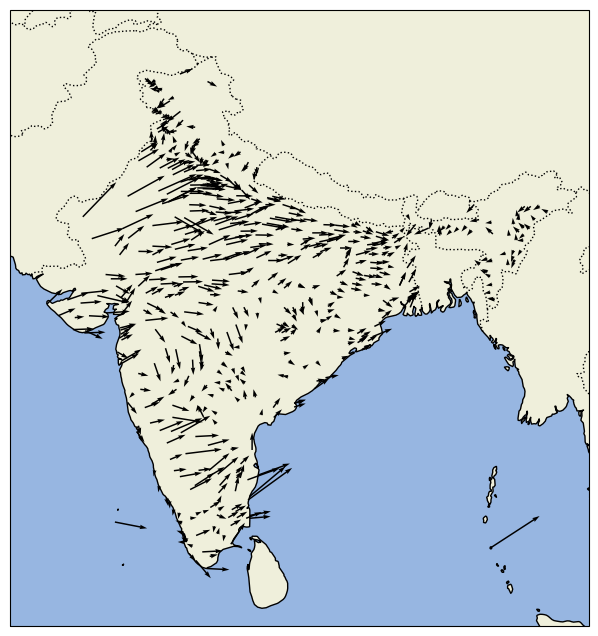

In [36]:
# # Convert wind speed from km/h to m/s
# wind_speed = wind_speed / 3.6

# # Convert wind direction from degrees to radians
# wind_dir = np.deg2rad(wind_dir)

# # Calculate the u and v components of the wind vectors
# u = -wind_speed * np.sin(wind_dir)
# v = -wind_speed * np.cos(wind_dir)

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create the quiver plot over the Indian map
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([67, 98, 5, 38], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.quiver(lon, lat, u, v)
plt.show()

In [37]:
andaman_d

,location_name,region,latitude,longitude,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,Ult_location
186,Arong,Andaman and Nicobar Islands,9.17,92.72,2023-09-02 05:15:00,27.0,Moderate or heavy rain shower,33.1,237,WSW,1009.0,3.3,83,90,30.6,7.0,6.0,52.6,Arong-Andaman and Nicobar Islands @ 2023-09-02...


In [38]:
# # Create a custom quiver plot using scatter traces
# fig = go.Figure()
# for x, y, dx, dy, color in zip(lon, lat, u, v, colors):
#     fig.add_trace(go.Scatter(x=[x, x + dx], y=[y, y + dy], mode='lines', line=dict(color=color)))
# fig.show()

In [39]:
# import plotly.graph_objs as go

# # Create the quiver plot over the Indian map
# fig = go.Figure(go.Scattermapbox(
#     mode='markers',
#     lon=lon,
#     lat=lat,
#     marker={'size': 10, 'symbol': 'circle'},
#     text=[f'Wind Speed: {ws} km/h' for ws in wind_speed],
#     hoverinfo='text'
# ))

# fig.add_trace(go.Cone(
#     x=lon,
#     y=lat,
#     u=u,
#     v=v,
#     sizemode='scaled',
#     sizeref=0.1,
#     anchor='tip'
# ))

# fig.update_layout(
#     mapbox={
#         'style': 'open-street-map',
#         'center': {'lon': 78.9629, 'lat': 20.5937},
#         'zoom': 3
#     },
#     margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
# )

# fig.show()

In [40]:
# import folium
# from folium.plugins import FloatImage
# import pandas as pd


# # Create a map centered at India
# m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# # Add markers and arrows to show wind conditions
# for x, y, dx, dy, ws in zip(lon, lat, u, v, wind_speed):
#     folium.Marker([y, x], icon=None).add_to(m)
#     folium.PolyLine([[y, x], [y + dy / 50, x + dx / 50]], color='blue').add_to(m)
#     FloatImage(f'<div style="color: blue;">{ws:.1f} km/h</div>', bottom=5, left=5).add_to(m)

# m


In [41]:
# # Create a custom quiver plot using scattermapbox traces
# fig = go.Figure()
# for x, y, dx, dy in zip(lon, lat, u, v):
#     fig.add_trace(go.Scattermapbox(
#         mode='lines',
#         lon=[x, x + dx],
#         lat=[y, y + dy],
#         line={'width': 2}
#     ))

# fig.update_layout(
#     mapbox={
#         'style': 'open-street-map',
#         'center': {'lon': 78.9629, 'lat': 20.5937},
#         'zoom': 3
#     },
#     margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
# )

# fig.show()

In [42]:
# # Create a custom quiver plot using scattermapbox traces
# fig = go.Figure()
# for x, y, dx, dy in zip(lon, lat, u, v):
#     # Create the line part of the arrow
#     fig.add_trace(go.Scattermapbox(
#         mode='lines',
#         lon=[x, x + dx],
#         lat=[y, y + dy],
#         line={'width': 2}
#     ))
    
#     # Create the arrowhead part of the arrow
#     fig.add_trace(go.Scattermapbox(
#         mode='markers',
#         lon=[x + dx],
#         lat=[y + dy],
#         marker={'size': 10, 'symbol': 'marker'}
#     ))

# fig.update_layout(
#     mapbox={
#         'style': 'open-street-map',
#         'center': {'lon': 78.9629, 'lat': 20.5937},
#         'zoom': 3
#     },
#     margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
# )

# fig.show()

In [43]:
# # Create a map centered at India
# m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# # Add markers and arrows to show wind conditions
# for x, y, dx, dy in zip(lon, lat, u, v):
#     folium.Marker([y, x], icon=None).add_to(m)
#     folium.PolyLine([[y, x], [y + dy / 50, x + dx / 50]], color='blue').add_to(m)

# m

In [44]:
# # Create a map centered at India
# m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# # Add markers and arrows to show wind conditions
# for x, y, dx, dy in zip(lon, lat, u, v):
#     folium.PolyLine([[y, x], [y + dy /10 , x + dx /10 ]], color='blue').add_to(m)

# m

In [45]:
# wind_dir

In [46]:
# import folium
# import math
# import pandas as pd
# # Create a map centered at India
# m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# lon = last_24_hr_Weather['longitude'] # your longitude data
# lat = last_24_hr_Weather['latitude'] # your latitude data
# wind_speed = last_24_hr_Weather['wind_kph'] # your wind speed data in km/h
# wind_dir = last_24_hr_Weather['wind_degree'] # your wind direction data in degrees

# # Convert wind speed from km/h to m/s
# wind_speed = wind_speed / 3.6

# # Convert wind direction from degrees to radians

# wind_dir = np.deg2rad(wind_dir)

# # Calculate the u and v components of the wind vectors
# u = -wind_speed * np.sin(wind_dir)
# v = -wind_speed * np.cos(wind_dir)



# # Add arrows to show wind conditions
# arrow_length = 0.5
# arrow_angle = math.pi / 6
# for x, y, dx, dy in zip(lon, lat, u, v):
#     start_x, start_y = x, y
#     end_x, end_y = x + dx / 50, y + dy / 50
#     folium.PolyLine([[start_y, start_x], [end_y, end_x]], color='blue').add_to(m)
    
#     angle = math.atan2(start_y - end_y, start_x - end_x)
#     left_arrow_x = end_x + arrow_length * math.cos(angle + arrow_angle)
#     left_arrow_y = end_y + arrow_length * math.sin(angle + arrow_angle)
#     right_arrow_x = end_x + arrow_length * math.cos(angle - arrow_angle)
#     right_arrow_y = end_y + arrow_length * math.sin(angle - arrow_angle)
#     folium.PolyLine([[end_y, end_x], [left_arrow_y, left_arrow_x]], color='blue').add_to(m)
#     folium.PolyLine([[end_y, end_x], [right_arrow_y, right_arrow_x]], color='blue').add_to(m)

# m

In [47]:
# # Create a map centered at India
# m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)


# st = 20


# # Add arrows to show wind conditions
# arrow_length = 0.5
# arrow_angle = math.pi / 6
# for x, y, dx, dy in zip(lon, lat, u, v):
#     start_x, start_y = x, y
#     end_x, end_y = x + dx / st, y + dy / st
# #     folium.PolyLine([[start_y, start_x], [end_y, end_x]], color='yellow').add_to(m)
    
    
#     angle = math.atan2(start_y - end_y, start_x - end_x)
#     left_arrow_x = end_x + arrow_length * math.cos(angle + arrow_angle)
#     left_arrow_y = end_y + arrow_length * math.sin(angle + arrow_angle)
#     right_arrow_x = end_x + arrow_length * math.cos(angle - arrow_angle)
#     right_arrow_y = end_y + arrow_length * math.sin(angle - arrow_angle)
#     folium.PolyLine([[end_y, end_x], [left_arrow_y, left_arrow_x]], color='green').add_to(m)
#     folium.PolyLine([[end_y, end_x], [right_arrow_y, right_arrow_x]], color='blue').add_to(m)

    
    
    
# for x, y, dx, dy in zip(lon, lat, u, v):
#     folium.PolyLine([[y, x], [y + dy /st , x + dx /st ]], color='red').add_to(m)

# m

In [48]:
# # Set up the data
# lon = last_24_hr_Weather['longitude'] # your longitude data
# lat = last_24_hr_Weather['latitude'] # your latitude data
# wind_speed = last_24_hr_Weather['wind_kph'] # your wind speed data in km/h
# wind_dir = last_24_hr_Weather['wind_degree'] # your wind direction data in degrees

# # Convert wind speed from km/h to m/s
# wind_speed = np.array(wind_speed) / 3.6

# # # Convert from meteorological angle to math angle
# k = wind_dir.map(meteo_to_math_wind_dir)


# # Convert wind direction from degrees to radians
# k = np.deg2rad(k)

# # Calculate the u and v components of the wind vectors
# u = wind_speed * np.cos(k)
# v = wind_speed * np.sin(k)



# # Create a map centered at India
# m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# # Add arrows to show wind conditions
# arrow_scale = 0.01
# arrow_angle = math.pi / 6
# arrow_length = 0.5
# for x, y, dx, dy, ws in zip(lon, lat, u, v, wind_speed):
#     start_x, start_y = x, y
#     end_x, end_y = x + dx * arrow_scale * ws, y + dy * arrow_scale * ws
#     folium.PolyLine([[start_y, start_x], [end_y, end_x]], color='blue').add_to(m)
#     angle = math.atan2(start_y - end_y, start_x - end_x)
#     left_arrow_x = end_x + arrow_length * math.cos(angle + arrow_angle)
#     left_arrow_y = end_y + arrow_length * math.sin(angle + arrow_angle)
#     right_arrow_x = end_x + arrow_length * math.cos(angle - arrow_angle)
#     right_arrow_y = end_y + arrow_length * math.sin(angle - arrow_angle)
#     folium.PolyLine([[end_y, end_x], [left_arrow_y, left_arrow_x]], color='blue').add_to(m)
#     folium.PolyLine([[end_y, end_x], [right_arrow_y, right_arrow_x]], color='blue').add_to(m)

# m

In [49]:
# wind_speed.min()

# wind_speed.max()

In [50]:
# wind_speed

In [51]:
# Liked map

# Set up the data
lon = last_24_hr_Weather['longitude'] # your longitude data
lat = last_24_hr_Weather['latitude'] # your latitude data
wind_speed = last_24_hr_Weather['wind_kph'] # your wind speed data in km/h
wind_dir = last_24_hr_Weather['wind_degree'] # your wind direction data in degrees

# Convert wind speed from km/h to m/s
wind_speed = np.array(wind_speed) / 3.6

# # Convert from meteorological angle to math angle
k = wind_dir.map(meteo_to_math_wind_dir)


# Convert wind direction from degrees to radians
k = np.deg2rad(k)

# Calculate the u and v components of the wind vectors
u = wind_speed * np.cos(k)
v = wind_speed * np.sin(k)



def calculate_percentile_p(min_value, max_value, p):
    # Create an array of values between the minimum and maximum values
    values = np.arange(min_value, max_value + 1)

    # Calculate the 25th percentile of the values
    percentile_p = np.percentile(values, int(p))

    return percentile_p


# Define a function to map wind speed values to colors
def get_color(ws):
    
    w_max = wind_speed.max()
    w_min = wind_speed.min()
    p25 = calculate_percentile_p(w_min,w_max, 25)
    p50 = calculate_percentile_p(w_min,w_max, 50)
    p75 = calculate_percentile_p(w_min,w_max, 75)

    
    if ws < p25:
        return 'blue'
    elif ws < p50:
        return 'green'
    elif ws < p75:
        return 'yellow'
    else:
        return 'red'






# Create a map centered at India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# Add arrows to show wind conditions
arrow_scale = 0.04
arrow_angle = math.pi / 6

shaft_arrow_width = 0.38 # Set the width of the arrows
head_arrow_width = 0.65


head_arrow_length_scale = 0.1

for x, y, dx, dy, ws in zip(lon, lat, u, v, wind_speed):
    
    start_x, start_y = x, y
    end_x, end_y = x + dx * arrow_scale * ws, y + dy * arrow_scale * ws
    
    # Get the color of the arrow based on the wind speed
    color = get_color(ws)

    folium.PolyLine([[start_y, start_x], [end_y, end_x]], color=color, weight=shaft_arrow_width).add_to(m)  # arrow shaft
    
    angle = math.atan2(start_y - end_y, start_x - end_x)
    
    # Calculate the head arrow length based on the wind speed
    head_arrow_length = head_arrow_length_scale * ws
    
    left_arrow_x = end_x + head_arrow_length * math.cos(angle + arrow_angle)
    left_arrow_y = end_y + head_arrow_length * math.sin(angle + arrow_angle)
    right_arrow_x = end_x + head_arrow_length * math.cos(angle - arrow_angle)
    right_arrow_y = end_y + head_arrow_length * math.sin(angle - arrow_angle)
    
    folium.PolyLine([[end_y, end_x], [left_arrow_y, left_arrow_x]], color=color, weight=head_arrow_width).add_to(m)
    folium.PolyLine([[end_y, end_x], [right_arrow_y, right_arrow_x]], color=color, weight=head_arrow_width).add_to(m)

m

In [52]:
# # Create a map centered at India
# m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# # Add arrows to show wind conditions
# arrow_scale = 0.01
# arrow_angle = math.pi / 6
# arrow_width = 2 # Set the width of the arrows
# for x, y, dx, dy, ws in zip(lon, lat, u, v, wind_speed):
#     start_x, start_y = x, y
#     end_x, end_y = x + dx * arrow_scale * ws, y + dy * arrow_scale * ws
#     folium.PolyLine([[start_y, start_x], [end_y, end_x]], color='blue', weight=arrow_width).add_to(m)
#     angle = math.atan2(start_y - end_y, start_x - end_x)
#     left_arrow_x = end_x + arrow_length * math.cos(angle + arrow_angle)
#     left_arrow_y = end_y + arrow_length * math.sin(angle + arrow_angle)
#     right_arrow_x = end_x + arrow_length * math.cos(angle - arrow_angle)
#     right_arrow_y = end_y + arrow_length * math.sin(angle - arrow_angle)
#     folium.PolyLine([[end_y, end_x], [left_arrow_y, left_arrow_x]], color='blue', weight=arrow_width).add_to(m)
#     folium.PolyLine([[end_y, end_x], [right_arrow_y, right_arrow_x]], color='blue', weight=arrow_width).add_to(m)

# # Add an arrow length scale to the map
# scale_lat = 5 # Set the latitude of the scale
# scale_lon_start = 67 # Set the longitude of the start of the scale
# scale_lon_end = 75 # Set the longitude of the end of the scale/
# scale_wind_speeds = [0, 10, 20, 30] # Set the wind speeds to show on the scale
# for ws in scale_wind_speeds:
#     x1 = scale_lon_start + (scale_lon_end - scale_lon_start) / (len(scale_wind_speeds) - 1) * scale_wind_speeds.index(ws)
#     x2 = x1 + ws * arrow_scale
#     folium.PolyLine([[scale_lat, x1], [scale_lat, x2]], color='blue', weight=arrow_width).add_to(m)
#     folium.Marker([scale_lat - 0.5, (x1 + x2) / 2], icon=folium.DivIcon(html=f'<div>{ws} km/h</div>')).add_to(m)

# m

In [53]:
# type(wind_speed)

# normalized_series = ((wind_speed - wind_speed.min()) / (wind_speed.max() - wind_speed.min())) * 100
# wind_speed.max()

In [54]:
# lon = last_24_hr_Weather['longitude'] # your longitude data
# lat = last_24_hr_Weather['latitude'] # your latitude data
# wind_speed = last_24_hr_Weather['wind_kph'] # your wind speed data in km/h
# wind_dir = last_24_hr_Weather['wind_degree'] # your wind direction data in degrees




# # Convert wind speed from km/h to m/s
# wind_speed = wind_speed / 3.6
# wind_speed = normalized_series
# # Convert wind direction from degrees to radians
# wind_dir = np.deg2rad(wind_dir)

# # Calculate the u and v components of the wind vectors
# u = -wind_speed * np.sin(wind_dir)
# v = -wind_speed * np.cos(wind_dir)


# # Create a map centered at India
# m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# # Add arrows to show wind conditions
# arrow_scale = 0.06 # Increase the scale of the arrow shaft
# arrow_angle = math.pi / 6
# arrow_length = 0.00005 # Decrease the length of the arrowhead
# arrow_width = 2 # Set the width of the arrows
# for x, y, dx, dy, ws in zip(lon, lat, u, v, wind_speed):
#     start_x, start_y = x, y
#     end_x, end_y = x + dx * arrow_scale * ws, y + dy * arrow_scale * ws
#     folium.PolyLine([[start_y, start_x], [end_y, end_x]], color='blue', weight=arrow_width).add_to(m)
#     angle = math.atan2(start_y - end_y, start_x - end_x)
#     left_arrow_x = end_x + arrow_length * math.cos(angle + arrow_angle)
#     left_arrow_y = end_y + arrow_length * math.sin(angle + arrow_angle)
#     right_arrow_x = end_x + arrow_length * math.cos(angle - arrow_angle)
#     right_arrow_y = end_y + arrow_length * math.sin(angle - arrow_angle)
#     folium.PolyLine([[end_y, end_x], [left_arrow_y, left_arrow_x]], color='blue', weight=arrow_width).add_to(m)
#     folium.PolyLine([[end_y, end_x], [right_arrow_y, right_arrow_x]], color='blue', weight=arrow_width).add_to(m)

# m